In [1]:
import scripts.read_land_use_no_gdal as land_use
import scripts.read_image_data as rid
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

In [13]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data' from '/home/mithrillion/Projects/EarthEngine/scripts/read_image_data.py'>

In [2]:
ds = rid.read_image_data(image_dir='area3/2014/images/', 
                         mask_dir='area3/2014/masks/', 
                         table_dir='area3/2014/tables/LC8_SR.csv')
ds_new = rid.read_image_data(image_dir='area3/2015/images/', 
                             mask_dir='area3/2015/masks/',
                             table_dir='area3/2015/tables/LC8_SR.csv')

In [3]:
res = ds[list(ds.keys())[0]].shape
(res[2], res[1])

(2387, 1976)

In [6]:
# polygon = "POLYGON ((144.0229424345357 -37.55299953752239, 144.02019905996406 -37.97282887730929, 144.6632499098556 -37.972670022747636, 144.66240633494579 -37.552454710108975, 144.0229424345357 -37.55299953752239))"
# array, unique_classes = land_use.read_land_use(buffer=-0.001, area_filter=polygon, resolution=(res[2], res[1]))

In [7]:
# pickle.dump([array, unique_classes], open('models/area3/array_n_unique_classes.pickle', 'wb'))

In [4]:
array, unique_classes = pickle.load(open('models/area3/array_n_unique_classes.pickle', 'rb'))

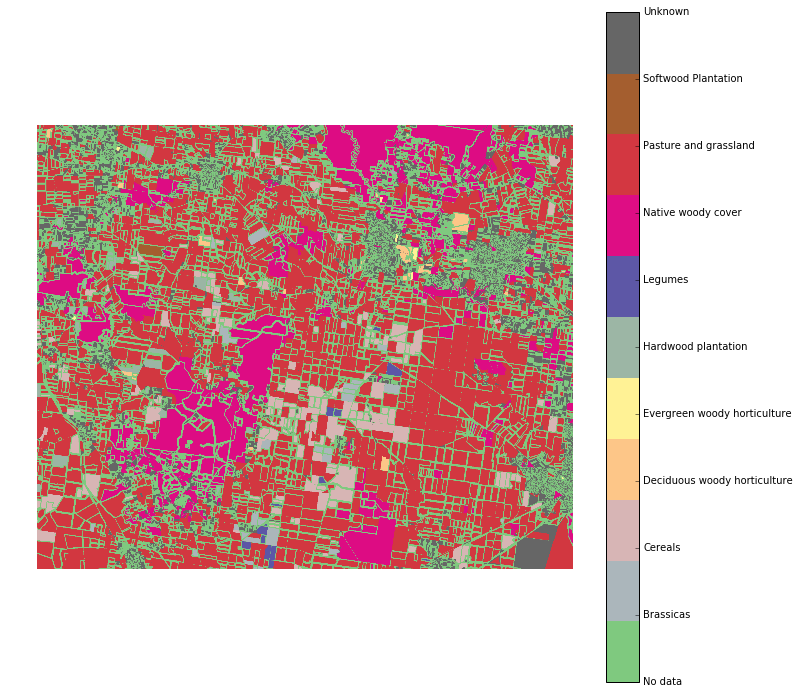

In [5]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(array, cmap=plt.cm.get_cmap('Accent', len(unique_classes)))
plt.colorbar(ticks=range(len(unique_classes)), format=plt.FuncFormatter(lambda val, loc: unique_classes[val]))
plt.show()

In [6]:
train = rid.generate_interpolated_set_from_timestamps(ds, times=list(ds_new.keys()), labels=array)

/home/mithrillion/anaconda3/lib/python3.5/site-packages/pandas/tools/merge.py:205: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [8]:
pickle.dump(train, open('models/area3/train.pickle', 'wb'), protocol=4)

In [9]:
del train

In [15]:
to_predict = rid.generate_interpolated_set_from_timestamps(ds_new, times=list(ds_new.keys()), on_self=True)

/home/mithrillion/anaconda3/lib/python3.5/site-packages/pandas/tools/merge.py:205: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [17]:
pickle.dump(to_predict, open('models/area3/to_predict.pickle', 'wb'), protocol=4)

In [18]:
del to_predict

pre-processing complete

In [ ]:
# train = pickle.load(open('models/area3/train.pickle', 'rb'))
# to_predict = pickle.load(open('models/area3/to_predict.pickle', 'rb'))

In [9]:
# del ds, ds_new

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import train_test_split

In [12]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, 
                             min_samples_leaf=20, 
                             random_state=0, n_jobs=8)

In [13]:
X = train.ix[train.ix[:, 'label'] != 0, 2:-1]
y = train.ix[train.ix[:, 'label'] != 0, 'label']

In [14]:
# pickle.dump([X, y], open('models/training_x_n_y.pickle', 'wb'))

In [15]:
# del train

In [16]:
Counter(y)

Counter({1: 23487,
         2: 284100,
         3: 37352,
         4: 36835,
         5: 210006,
         6: 16442,
         7: 51447})

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.98      0.76      0.86      7836
          2       0.92      0.94      0.93     93557
          3       0.94      0.71      0.81     12446
          4       0.84      0.87      0.86     12166
          5       0.83      0.92      0.87     69348
          6       0.97      0.88      0.92      5483
          7       0.77      0.52      0.62     16855

avg / total       0.88      0.88      0.87    217691



In [18]:
# pickle.dump(model, open('models/area3_2014_model.pickle', 'wb'))
# del X_train, X_test, y_train, y_test

In [19]:
X_new = to_predict.iloc[:, 2:]
cls_table = to_predict.iloc[:, :2]
# del to_predict

In [20]:
# pickle.dump(cls_table, open('models/cls_table.pickle', 'wb'))

In [21]:
# pickle.dump(X_new, open('models/X_new.pickle', 'wb'), protocol=4)

Not enough memory... predicting in a different notebook